**LIBRAIES TO BE IMPORTED**

In [653]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

##### Read CSV file & display information on the dataframe.

In [654]:
data = pd.read_csv('titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Display first 10 rows of the data.

In [655]:
print(data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

##### Display first 5 rows of the data having the given columns only.
**‘PassengerID’, ‘Name’, ‘Age’, ‘Sex’**

In [656]:
print(data[['PassengerId', 'Name', 'Age', 'Sex']].head(5))

   PassengerId                                               Name   Age  \
0            1                            Braund, Mr. Owen Harris  22.0   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2            3                             Heikkinen, Miss. Laina  26.0   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4            5                           Allen, Mr. William Henry  35.0   

      Sex  
0    male  
1  female  
2  female  
3  female  
4    male  


##### Plot the count of survived passengers.

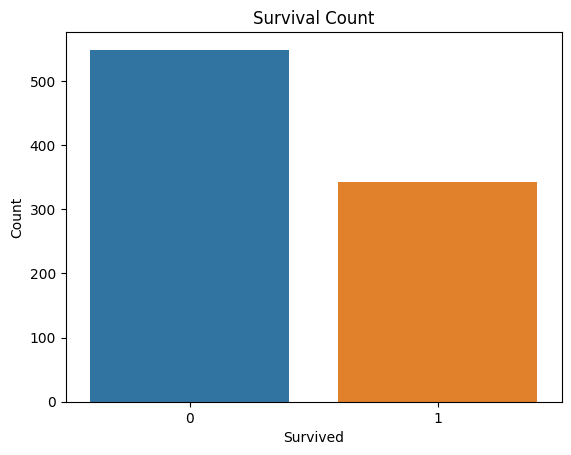

In [657]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

##### Plot histogram of ‘Age’ column

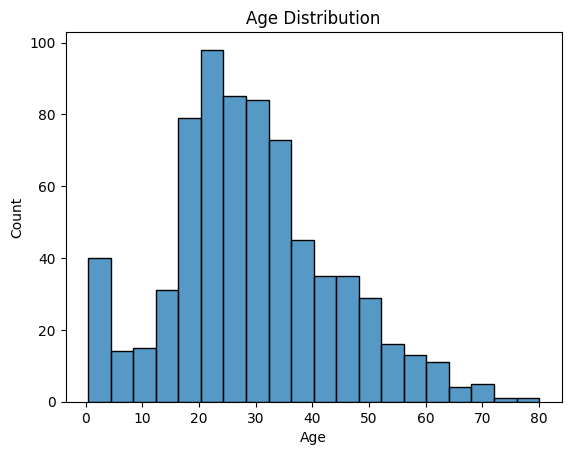

In [658]:
sns.histplot(x='Age', data=data, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### Drop the following unnecessary columns.
**‘PassengerID’,’Name’, ‘Ticket’, ‘Cabin’, ‘Embarked’**

In [659]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
print(data.head(5))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


##### How many ‘NaN’ entries in ‘Age’ column? Replace all ‘NaN’ values in the ‘Age’ column with mean value of the ‘Age’ column vector. (Mean value replacement is a popular choice. It will not make a considerable damage to the data distribution in the column vector!). Please round off the mean value to two decimals.

Number of NaN entries in 'Age' column: 177
Mean age: 29.7


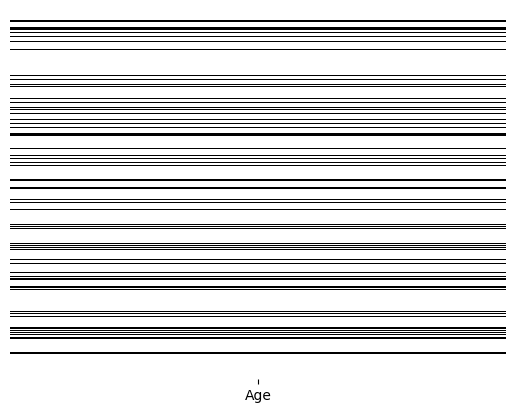

In [660]:
age_nan = data['Age'].isnull().squeeze()
sns.heatmap(data = age_nan.to_frame(), yticklabels=False, cbar=False, cmap='binary')
nan_count = age_nan.sum()
print("Number of NaN entries in 'Age' column:", nan_count)

mean_age = round(data['Age'].mean(), 2)
print("Mean age:", mean_age)
data['Age'].fillna(mean_age, inplace=True)

##### The entries in ‘Sex’ column are ‘Male’ or ‘Female’. ‘Pclass’ can have ‘1st’, ‘2nd’, or ‘3rd’. We should convert them to numerical values. The result has two separate column for ‘Female’ and ‘Male’. It is obvious that the ‘0’ value in ‘Female’ column means ‘1’ in Male and vice versa (based on the given data). So, we need any one column only in the preprocessed dataset.3 ‘Pclass’ category and hence, we need any two columns in the results.

In [661]:
sex = pd.get_dummies(data['Sex'], drop_first=True)
pclass = pd.get_dummies(data['Pclass'], drop_first=True)

##### Concatenate the results of ‘Sex’ and ‘Pclass’ from previous step to get the following pre-processed dataset.

In [662]:
data = pd.concat([data, sex, pclass], axis=1)

##### Next, drop ‘Pclass’ and ‘Sex’ from the data frame to obtain the following:

In [663]:
data.drop(['Pclass', 'Sex'], axis=1, inplace=True)

##### We can rename the column names as shown below (for onvenience):

In [664]:
data.rename(columns={'male': 'sex', 2: 'pclass_2', 3: 'pclass_3'}, inplace=True)
print(data.head(5))

   Survived   Age  SibSp  Parch     Fare  sex  pclass_2  pclass_3
0         0  22.0      1      0   7.2500    1         0         1
1         1  38.0      1      0  71.2833    0         0         0
2         1  26.0      0      0   7.9250    0         0         1
3         1  35.0      1      0  53.1000    0         0         0
4         0  35.0      0      0   8.0500    1         0         1


##### Make a ratio of 30% and 70% for test and train dataset.

In [665]:
features = data[['Age', 'SibSp', 'Parch', 'Fare', 'sex', 'pclass_2','pclass_3']]

train_data, test_data, train_labels, test_labels = train_test_split(features, data['Survived'], test_size=0.3, random_state=42)

In [666]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

#### Apply the following models:
**(a) Logistic regression**

In [667]:
logmodel = LogisticRegression()
logmodel.fit(train_data, train_labels)
log_predictions = logmodel.predict(test_data)
log_accuracy = (log_predictions == test_labels).sum() / test_labels.shape[0]

print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 0.8097014925373134


**(i) Plot confusion matrix.
(ii) Find Precision, Recall, F1score, and Accuracy.**

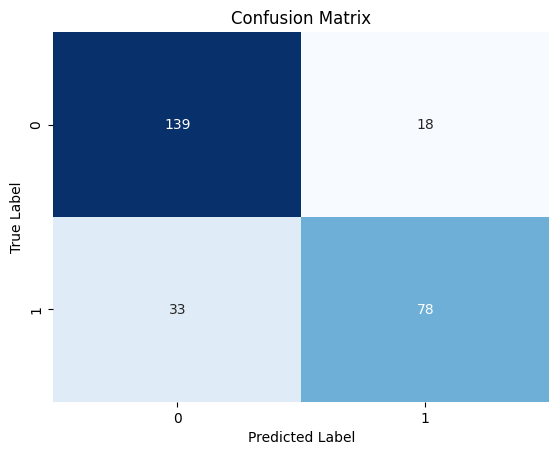

Precision: 0.8125
Recall: 0.7027027027027027
F1 Score: 0.7536231884057971
Accuracy: 0.8097014925373134


In [668]:
cm = confusion_matrix(test_labels, log_predictions)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

precision = precision_score(test_labels, log_predictions)
recall = recall_score(test_labels, log_predictions)
f1 = f1_score(test_labels, log_predictions)
accuracy = accuracy_score(test_labels, log_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Accuracy:', accuracy)

**(b) Neural Networks classifier**

In [669]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000)
nn_model.fit(train_data, train_labels)
nn_predictions = nn_model.predict(test_data)

nn_accuracy = (nn_predictions == test_labels).sum() / test_labels.shape[0]
print("Neural Network Accuracy:", nn_accuracy)

Neural Network Accuracy: 0.8134328358208955


**(i) Plot confusion matrix.
(ii) Find Precision, Recall, F1score, and Accuracy.**

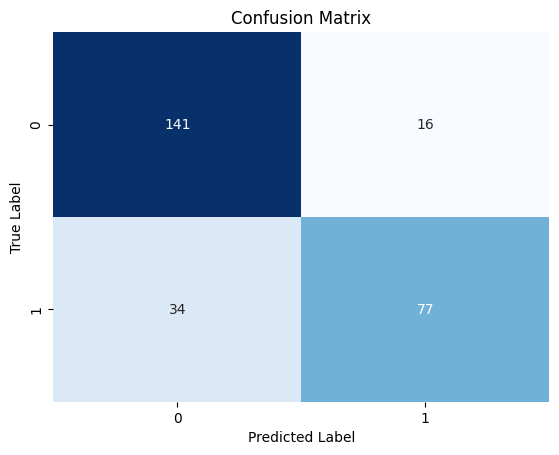

Precision: 0.8279569892473119
Recall: 0.6936936936936937
F1 Score: 0.7549019607843137
Accuracy: 0.8134328358208955


In [670]:
cm = confusion_matrix(test_labels, nn_predictions)


sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

precision = precision_score(test_labels, nn_predictions)
recall = recall_score(test_labels, nn_predictions)
f1 = f1_score(test_labels, nn_predictions)
accuracy = accuracy_score(test_labels, nn_predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Accuracy:', accuracy)